## Import Required Liabrary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import cv2
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')
from keras.models import load_model

In [2]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout,MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

### First step is to access the folder and image
This code is only for understanding purpose about the right path

In [7]:
def access_folders(path, categories):
    folders_and_images = []
    
    for category in categories:
        folder_path = os.path.join(path, category)
        folders_and_images.append(folder_path)

    return folders_and_images

In [8]:
path_to_data = r"C:\Users\Akash\OneDrive\Desktop\cloud\Driver"
categories = ['other_activities', 'safe_driving', 'talking_phone', 'texting_phone', 'turning']

In [9]:
result = access_folders(path_to_data, categories)
result

['C:\\Users\\Akash\\OneDrive\\Desktop\\cloud\\Driver\\other_activities',
 'C:\\Users\\Akash\\OneDrive\\Desktop\\cloud\\Driver\\safe_driving',
 'C:\\Users\\Akash\\OneDrive\\Desktop\\cloud\\Driver\\talking_phone',
 'C:\\Users\\Akash\\OneDrive\\Desktop\\cloud\\Driver\\texting_phone',
 'C:\\Users\\Akash\\OneDrive\\Desktop\\cloud\\Driver\\turning']

### Accessing individual image in folder

In [10]:
def access_individual_images(path, categories):
    image_paths = []

    for category in categories:
        folder_path = os.path.join(path, category)
        for image in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image)
            image_paths.append(image_path)

    return image_paths

In [11]:
path_to_data = r"C:\Users\MR.GODHADE\Desktop\SEM3\CP2_Vijay_Patil_PGA_41\Driver"
categories = ['other_activities', 'safe_driving', 'talking_phone', 'texting_phone', 'turning']

In [51]:
result = access_individual_images(path_to_data, categories)
result[0:3]

['C:\\Users\\MR.GODHADE\\Desktop\\SEM3\\CP2_Vijay_Patil_PGA_41\\Driver\\other_activities\\2019-04-2416-05-13.png',
 'C:\\Users\\MR.GODHADE\\Desktop\\SEM3\\CP2_Vijay_Patil_PGA_41\\Driver\\other_activities\\2019-04-2416-06-20.png',
 'C:\\Users\\MR.GODHADE\\Desktop\\SEM3\\CP2_Vijay_Patil_PGA_41\\Driver\\other_activities\\2019-04-2416-06-37.png']

### Label to the Images

In [13]:
def load_images(path, image_size):
    input_image = [] 
    cate = ['other_activities', 'safe_driving', 'talking_phone', 'texting_phone', 'turning']   

    for i in cate:
        folders = os.path.join(path, i)
        label = cate.index(i)            # Label (0,1,2,3,4)
        for image in os.listdir(folders):
            image_path = os.path.join(folders, image)
            image_array = cv2.imread(image_path)

            # Check if the image is successfully loaded
            if image_array is not None:
                image_array = cv2.resize(image_array, (image_size, image_size)) # resize each image
                input_image.append([image_array, label])

    return input_image

#input_image = [(image_array1, label1), (image_array2, label2), ...]

In [14]:
path_to_data = r"C:\Users\MR.GODHADE\Desktop\SEM3\CP2_Vijay_Patil_PGA_41\Driver"

In [15]:
data = load_images(path_to_data,image_size=100)

In [52]:
data[0]

[array([[[250, 242, 245],
         [250, 242, 245],
         [250, 242, 245],
         ...,
         [ 54,  60,  50],
         [ 54,  62,  49],
         [ 62,  64,  46]],
 
        [[250, 242, 245],
         [250, 242, 245],
         [250, 242, 245],
         ...,
         [ 55,  58,  46],
         [ 58,  63,  51],
         [ 62,  65,  49]],
 
        [[250, 242, 245],
         [250, 242, 245],
         [250, 242, 245],
         ...,
         [ 45,  47,  37],
         [ 50,  53,  41],
         [ 52,  55,  43]],
 
        ...,
 
        [[228, 222, 196],
         [229, 224, 197],
         [229, 224, 197],
         ...,
         [ 59,  74,  87],
         [ 55,  67,  78],
         [ 64,  56,  58]],
 
        [[224, 219, 192],
         [214, 208, 182],
         [228, 222, 196],
         ...,
         [ 54,  63,  81],
         [ 58,  67,  83],
         [ 58,  67,  78]],
 
        [[207, 201, 176],
         [209, 203, 178],
         [210, 205, 180],
         ...,
         [ 56,  64,  77],
  

### Separate X & Y

In [18]:
def extract_X_Y(input_image):
    X = []
    Y = []

    for X_values, Y_values in input_image:
        X.append(X_values)
        Y.append(Y_values)

    X = np.array(X)
    Y = np.array(Y)

    return X, Y


X_result, Y_result = extract_X_Y(data)

In [53]:
X_result[0]

array([[[250, 242, 245],
        [250, 242, 245],
        [250, 242, 245],
        ...,
        [ 54,  60,  50],
        [ 54,  62,  49],
        [ 62,  64,  46]],

       [[250, 242, 245],
        [250, 242, 245],
        [250, 242, 245],
        ...,
        [ 55,  58,  46],
        [ 58,  63,  51],
        [ 62,  65,  49]],

       [[250, 242, 245],
        [250, 242, 245],
        [250, 242, 245],
        ...,
        [ 45,  47,  37],
        [ 50,  53,  41],
        [ 52,  55,  43]],

       ...,

       [[228, 222, 196],
        [229, 224, 197],
        [229, 224, 197],
        ...,
        [ 59,  74,  87],
        [ 55,  67,  78],
        [ 64,  56,  58]],

       [[224, 219, 192],
        [214, 208, 182],
        [228, 222, 196],
        ...,
        [ 54,  63,  81],
        [ 58,  67,  83],
        [ 58,  67,  78]],

       [[207, 201, 176],
        [209, 203, 178],
        [210, 205, 180],
        ...,
        [ 56,  64,  77],
        [ 59,  69,  82],
        [ 54,  63,  74]]

In [20]:
Y_result

array([0, 0, 0, ..., 4, 4, 4])

### Preprocessing

In [54]:
def preprocess_data(X):
    # Normalize X
    X = X / 255.0

    # Convert Y to categorical
    #Y_categorical = to_categorical(Y)

    return X

X_result_normalized = preprocess_data(X_result)
X_result_normalized[0]

array([[[0.98039216, 0.94901961, 0.96078431],
        [0.98039216, 0.94901961, 0.96078431],
        [0.98039216, 0.94901961, 0.96078431],
        ...,
        [0.21176471, 0.23529412, 0.19607843],
        [0.21176471, 0.24313725, 0.19215686],
        [0.24313725, 0.25098039, 0.18039216]],

       [[0.98039216, 0.94901961, 0.96078431],
        [0.98039216, 0.94901961, 0.96078431],
        [0.98039216, 0.94901961, 0.96078431],
        ...,
        [0.21568627, 0.22745098, 0.18039216],
        [0.22745098, 0.24705882, 0.2       ],
        [0.24313725, 0.25490196, 0.19215686]],

       [[0.98039216, 0.94901961, 0.96078431],
        [0.98039216, 0.94901961, 0.96078431],
        [0.98039216, 0.94901961, 0.96078431],
        ...,
        [0.17647059, 0.18431373, 0.14509804],
        [0.19607843, 0.20784314, 0.16078431],
        [0.20392157, 0.21568627, 0.16862745]],

       ...,

       [[0.89411765, 0.87058824, 0.76862745],
        [0.89803922, 0.87843137, 0.77254902],
        [0.89803922, 0

### Train Test Split

In [23]:
def split_and_categorical(X, Y, test_size=0.2):
    
    # Split the data into training and testing sets
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=test_size, random_state=42)

    # Normalize the training set
    #train_x = train_x / 255.0

    # Convert the training labels to categorical
    train_y_categorical = to_categorical(train_y)

    return train_x, test_x, train_y_categorical, test_y


train_x, test_x, train_y, test_y = split_and_categorical(X_result_normalized, Y_result)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)


(8600, 100, 100, 3) (8600, 5) (2151, 100, 100, 3) (2151,)


### Model Building

In [26]:
def create_and_train_model(train_x, train_y, epochs, batch_size, validation_split):
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())

 
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(5, activation='softmax'))

    # Using Adam optimizer with a learning rate of 0.001
    adam = Adam(learning_rate=0.001)
    model.compile(optimizer=adam, loss='CategoricalCrossentropy', metrics=['accuracy'])

    # Training the model
    model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

    return model

# Example usage:
# Assuming 'train_x' and 'train_y' are the outputs from the previous steps
trained_model = create_and_train_model(train_x, train_y, epochs=10, batch_size=24, validation_split=0.1)


Epoch 1/10
323/323 [==============================] - 195s 541ms/step - loss: 0.7103 - accuracy: 0.7202 - val_loss: 0.1949 - val_accuracy: 0.9233
Epoch 2/10
323/323 [==============================] - 166s 515ms/step - loss: 0.1405 - accuracy: 0.9516 - val_loss: 0.1186 - val_accuracy: 0.9570
Epoch 3/10
323/323 [==============================] - 178s 552ms/step - loss: 0.0677 - accuracy: 0.9764 - val_loss: 0.0686 - val_accuracy: 0.9756
Epoch 4/10
323/323 [==============================] - 164s 509ms/step - loss: 0.0586 - accuracy: 0.9809 - val_loss: 0.0697 - val_accuracy: 0.9802
Epoch 5/10
323/323 [==============================] - 164s 508ms/step - loss: 0.0392 - accuracy: 0.9859 - val_loss: 0.0807 - val_accuracy: 0.9698
Epoch 6/10
323/323 [==============================] - 164s 509ms/step - loss: 0.0426 - accuracy: 0.9854 - val_loss: 0.0496 - val_accuracy: 0.9802
Epoch 7/10
323/323 [==============================] - 164s 508ms/step - loss: 0.0526 - accuracy: 0.9832 - val_loss: 0.0819 -

In [27]:
pred_prob= trained_model.predict(test_x)

68/68 [==============================] - 9s 128ms/step


In [28]:
pred= pred_prob.argmax(axis=1)

In [29]:
from sklearn.metrics import confusion_matrix

### Confusion Matrix

In [30]:
tab_acc= confusion_matrix(test_y, pred)
tab_acc

array([[396,   4,   5,   2,   9],
       [  3, 450,   3,   0,   4],
       [ 14,   9, 402,   3,   2],
       [  2,  11,   2, 421,   0],
       [  1,   0,   0,   0, 408]], dtype=int64)

### Accuracy

In [31]:
tab_acc.diagonal().sum()*100/tab_acc.sum()

96.55973965597397

### Save Trained Model

In [36]:
trained_model.save("final_Diver_model.h5")

In [49]:
from keras.models import load_model

### Load Model

In [38]:
dmodel = load_model(r"Driver_Behavior.h5")

In [41]:
def model_output1 (path):
    raw_img = cv2.imread(path)   # importing image
    raw_img =cv2.resize(raw_img , (100 , 100) ) 
    raw_img = np.array(raw_img) # convert image to array
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    Probability = dmodel.predict(raw_img)
    print(Probability)# probability for each classes
    pred= Probability.argmax(axis=1)
    print(pred)
    print(plt.imshow(cv2.imread(path)))                # Display Image
    if pred == 0:
        print("other_activities")
    elif pred == 1:
        print("safe_driving")
    elif pred == 2:
        print("talking_phone")
    elif pred == 3:
        print("texting_phone")
    else:
        print("turning")
    

'other_activities', 'safe_driving', 'talking_phone', 'texting_phone', 'turning'

('other_activities',
 'safe_driving',
 'talking_phone',
 'texting_phone',
 'turning')

### Prediction on Unseen Data

1/1 [==============================] - 0s 106ms/step
[[0.03655016 0.45522678 0.02492945 0.46977964 0.01351401]]
[3]
AxesImage(80,52.8;496x369.6)
texting_phone


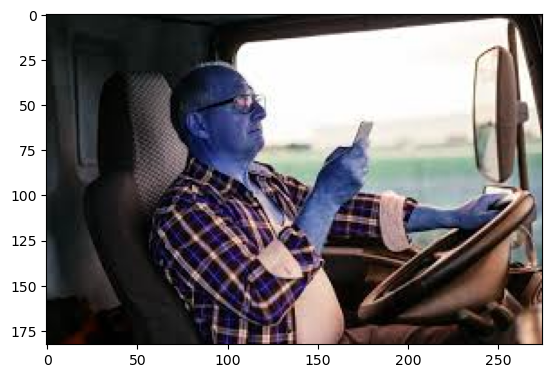

In [56]:
model_output1(r"C:\Users\MR.GODHADE\Desktop\SEM3\CP2_Vijay_Patil_PGA_41\images (2).jpg")

1/1 [==============================] - 0s 55ms/step
[[1.7765136e-06 4.6800503e-07 9.9999654e-01 1.0319484e-06 7.8129482e-08]]
[2]
AxesImage(80,52.8;496x369.6)
talking_phone


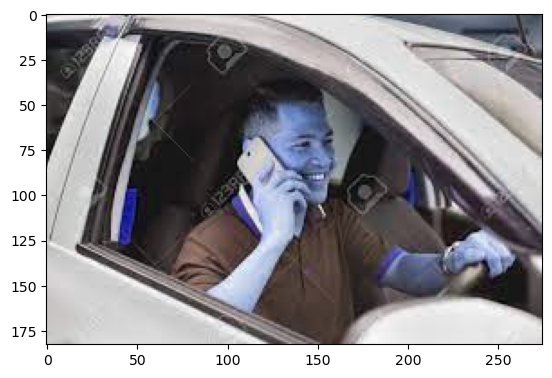

In [44]:
model_output1(r"C:\Users\MR.GODHADE\Desktop\SEM3\CP2_Vijay_Patil_PGA_41\download.jpg")

1/1 [==============================] - 0s 35ms/step
[[9.9935061e-01 2.8686493e-04 1.1500128e-04 1.6033943e-04 8.7175868e-05]]
[0]
AxesImage(80,52.8;496x369.6)
other_activities


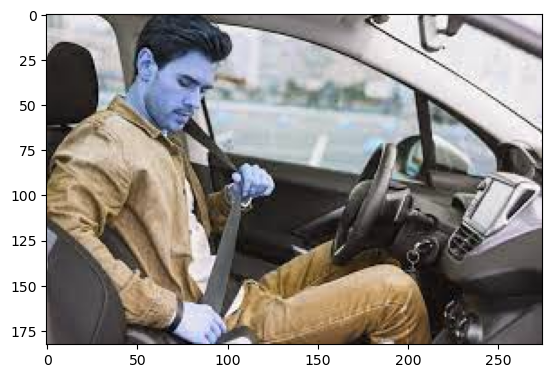

In [45]:
model_output1(r"C:\Users\MR.GODHADE\Desktop\SEM3\CP2_Vijay_Patil_PGA_41\download1.jpg")

1/1 [==============================] - 0s 44ms/step
[[1.9498035e-05 3.7507110e-05 4.5022269e-05 1.9215895e-05 9.9987876e-01]]
[4]
AxesImage(80,52.8;496x369.6)
turning


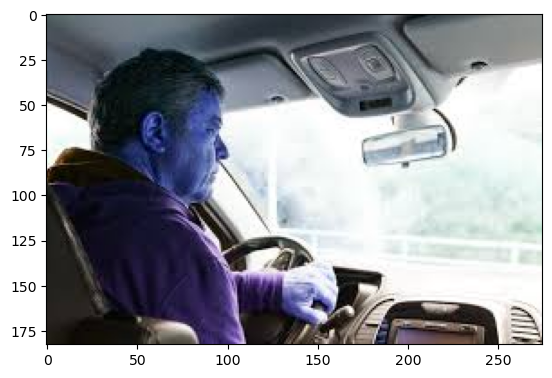

In [46]:
model_output1(r"C:\Users\MR.GODHADE\Desktop\SEM3\CP2_Vijay_Patil_PGA_41\images.jpg")

1/1 [==============================] - 0s 48ms/step
[[3.4278917e-06 9.9999392e-01 1.2154294e-06 1.4516324e-06 4.6251674e-08]]
[1]
AxesImage(80,52.8;496x369.6)
safe_driving


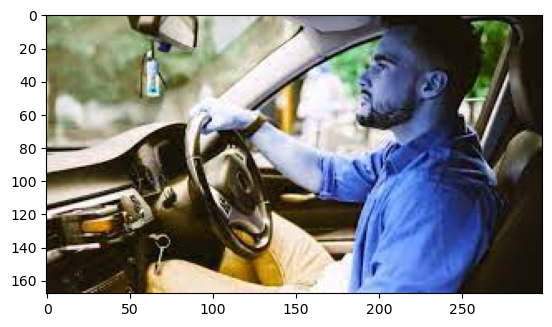

In [48]:
model_output1(r"C:\Users\MR.GODHADE\Desktop\SEM3\CP2_Vijay_Patil_PGA_41\Safe_drive.jpg")